# 1.Import necessary packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/incomeexpenditure-dataset/Inc_Exp_Data.csv


# 2.Load the file

In [2]:
income_df=pd.read_csv("/kaggle/input/incomeexpenditure-dataset/Inc_Exp_Data.csv")

In [3]:
income_df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


# 3.Analyze the data

In [4]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Mthly_HH_Income             50 non-null int64
Mthly_HH_Expense            50 non-null int64
No_of_Fly_Members           50 non-null int64
Emi_or_Rent_Amt             50 non-null int64
Annual_HH_Income            50 non-null int64
Highest_Qualified_Member    50 non-null object
No_of_Earning_Members       50 non-null int64
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [5]:
income_df.shape

(50, 7)

In [6]:
income_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.0,41558.00,26097.908979,5000.0,23550.0,35000.0,50375.0,100000.0
Mthly_HH_Expense,50.0,18818.00,12090.216824,2000.0,10000.0,15500.0,25000.0,50000.0
No_of_Fly_Members,50.0,4.06,1.517382,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,50.0,3060.00,6241.434948,0.0,0.0,0.0,3500.0,35000.0
Annual_HH_Income,50.0,490019.04,320135.792123,64200.0,258750.0,447420.0,594720.0,1404000.0
No_of_Earning_Members,50.0,1.46,0.734291,1.0,1.0,1.0,2.0,4.0


In [7]:
income_df.isna().any()

Mthly_HH_Income             False
Mthly_HH_Expense            False
No_of_Fly_Members           False
Emi_or_Rent_Amt             False
Annual_HH_Income            False
Highest_Qualified_Member    False
No_of_Earning_Members       False
dtype: bool

No null values in the dataset

# 4.What is the Mean Expense of a Household?

In [8]:
income_df["Mthly_HH_Expense"].mean()

18818.0

# 5.What is the Median Household Expense?

In [9]:
income_df["Mthly_HH_Expense"].median()

15500.0

# 6.What is the Monthly Expense for most of the Households?


In [10]:
mth_exp_tmp = pd.crosstab(index=income_df["Mthly_HH_Expense"], columns="count")
mth_exp_tmp.reset_index(inplace=True)
mth_exp_tmp[mth_exp_tmp['count'] == income_df.Mthly_HH_Expense.value_counts().max()]

col_0,Mthly_HH_Expense,count
18,25000,8


# 7.Plot the Histogram to count the Highest qualified member


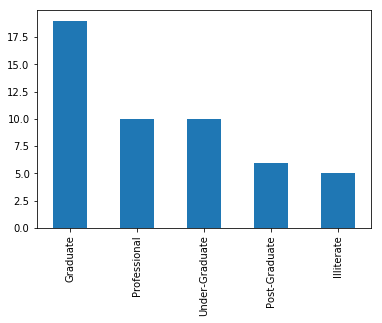

In [11]:
income_df["Highest_Qualified_Member"].value_counts().plot(kind="bar")

# 8.Calculate IQR(difference between 75% and 25% quartile)

15000.0

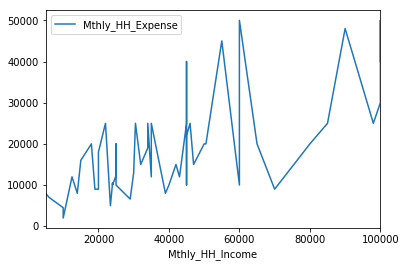

In [12]:
income_df.plot(x="Mthly_HH_Income", y="Mthly_HH_Expense")
IQR=income_df["Mthly_HH_Expense"].quantile(0.75)-income_df["Mthly_HH_Expense"].quantile(0.25)
IQR

# 9.Calculate Standard Deviation for first 4 columns.

In [13]:
pd.DataFrame(income_df.iloc[:,0:5].std().to_frame()).T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,26097.908979,12090.216824,1.517382,6241.434948,320135.792123


# 10.Calculate Variance for first 3 columns.


In [14]:
pd.DataFrame(income_df.iloc[:,0:4].var().to_frame()).T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt
0,6.811009e+08,1.461733e+08,2.302449,3.895551e+07


# 11.Calculate the count of Highest qualified member.


In [15]:
income_df["Highest_Qualified_Member"].value_counts().to_frame().T

,Graduate,Professional,Under-Graduate,Post-Graduate,Illiterate
Highest_Qualified_Member,19,10,10,6,5


# 11.Calculate the count of Highest qualified member.

In [16]:
income_df["Highest_Qualified_Member"].value_counts().to_frame().T

,Graduate,Professional,Under-Graduate,Post-Graduate,Illiterate
Highest_Qualified_Member,19,10,10,6,5


# 12.Plot the Histogram to count the No_of_Earning_Members


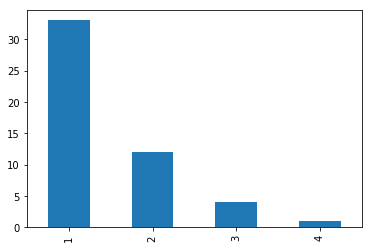

In [17]:
income_df["No_of_Earning_Members"].value_counts().plot(kind="bar")

# 13.Suppose you have option to invest in Stock A or Stock B. The stocks • have different expected returns and standard deviations. The expected return of Stock A is 15% and Stock B is 10%. Standard Deviation of the returns of these stocks is 10% and 5% respectively.

Which is better investment?

In [18]:
#Here we need to calculate the coeff of variation 

Coeff_of_var_StockA=10/15
print(Coeff_of_var_StockA)
Coeff_of_var_StockB=5/10
print(Coeff_of_var_StockB)

0.6666666666666666
0.5
